**Battery Remaining Useful Life (RUL)(Regression Problem)**

Predict the RUL of batteries by features based on voltage and current.




In [ ]:
#importing pandas to read the csv file
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/UTS/Battery_RUL.csv')

In [ ]:
df.head() #printing the first 5 values of dataset

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107


In [ ]:
df.describe() # getting the states of the dataset

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
count,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000
mean,556.155005,4581.273960,1239.784672,3.908176,3.577904,3768.336171,5461.266970,10066.496204,554.194172
std,322.378480,33144.012077,15039.589269,0.091003,0.123695,9129.552477,25155.845202,26415.354121,322.434514
min,1.000000,8.690000,-397645.908000,3.043000,3.022000,-113.584000,5.980000,5.980000,0.000000
25%,271.000000,1169.310000,319.600000,3.846000,3.488000,1828.884179,2564.310000,7841.922500,277.000000
50%,560.000000,1557.250000,439.239471,3.906000,3.574000,2930.203500,3824.260000,8320.415000,551.000000
75%,833.000000,1908.000000,600.000000,3.972000,3.663000,4088.326500,5012.350000,8763.282500,839.000000
max,1134.000000,958320.370000,406703.768000,4.363000,4.379000,245101.117000,880728.100000,880728.100000,1133.000000


In [ ]:
#importing the libraries required for visaulization
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Plotting the co-realtion matrix for checking which variables are contributing to the target variable.

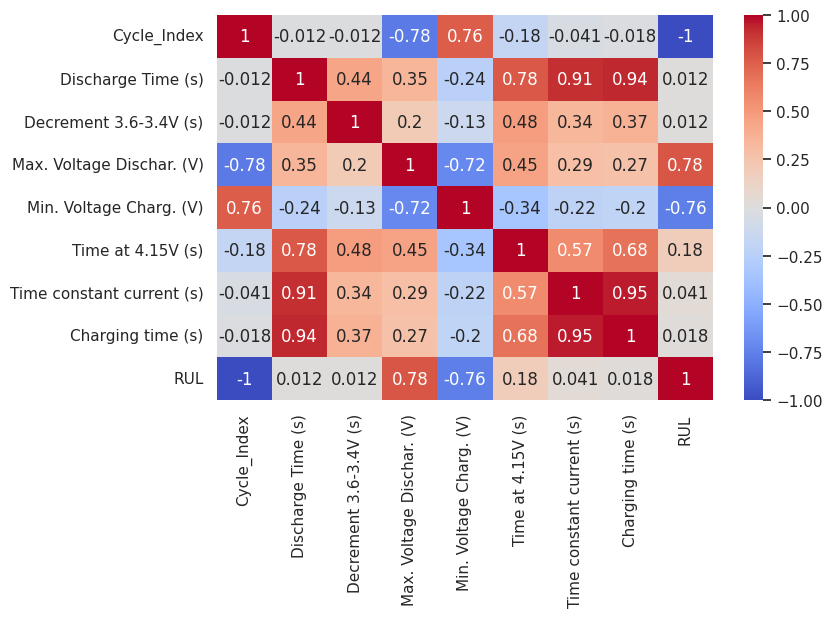

In [ ]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

Retaining the features which are having high co-relation which are 'Cycle_Index', 'Max. Voltage Dischar. (V)',
                     'Min. Voltage Charg. (V)', 'Time at 4.15V (s)', 'RUL' .
                    
                    

In [ ]:
selected_features = ['Cycle_Index', 'Max. Voltage Dischar. (V)',
                     'Min. Voltage Charg. (V)', 'Time at 4.15V (s)', 'RUL']
df_new = df[selected_features]

In [ ]:
df_new #printing the new dataset with updated features

,Cycle_Index,Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),RUL
0,1.0,3.670,3.211,5460.001,1112
1,2.0,4.246,3.220,5508.992,1111
2,3.0,4.249,3.224,5508.993,1110
3,4.0,4.250,3.225,5502.016,1109
4,6.0,4.290,3.398,5480.992,1107
...,...,...,...,...,...
15059,1108.0,3.773,3.742,922.775,4
15060,1109.0,3.773,3.744,915.512,3
15061,1110.0,3.773,3.742,915.513,2
15062,1111.0,3.763,3.839,539.375,1


Visualising the new features for getting information about the dataset

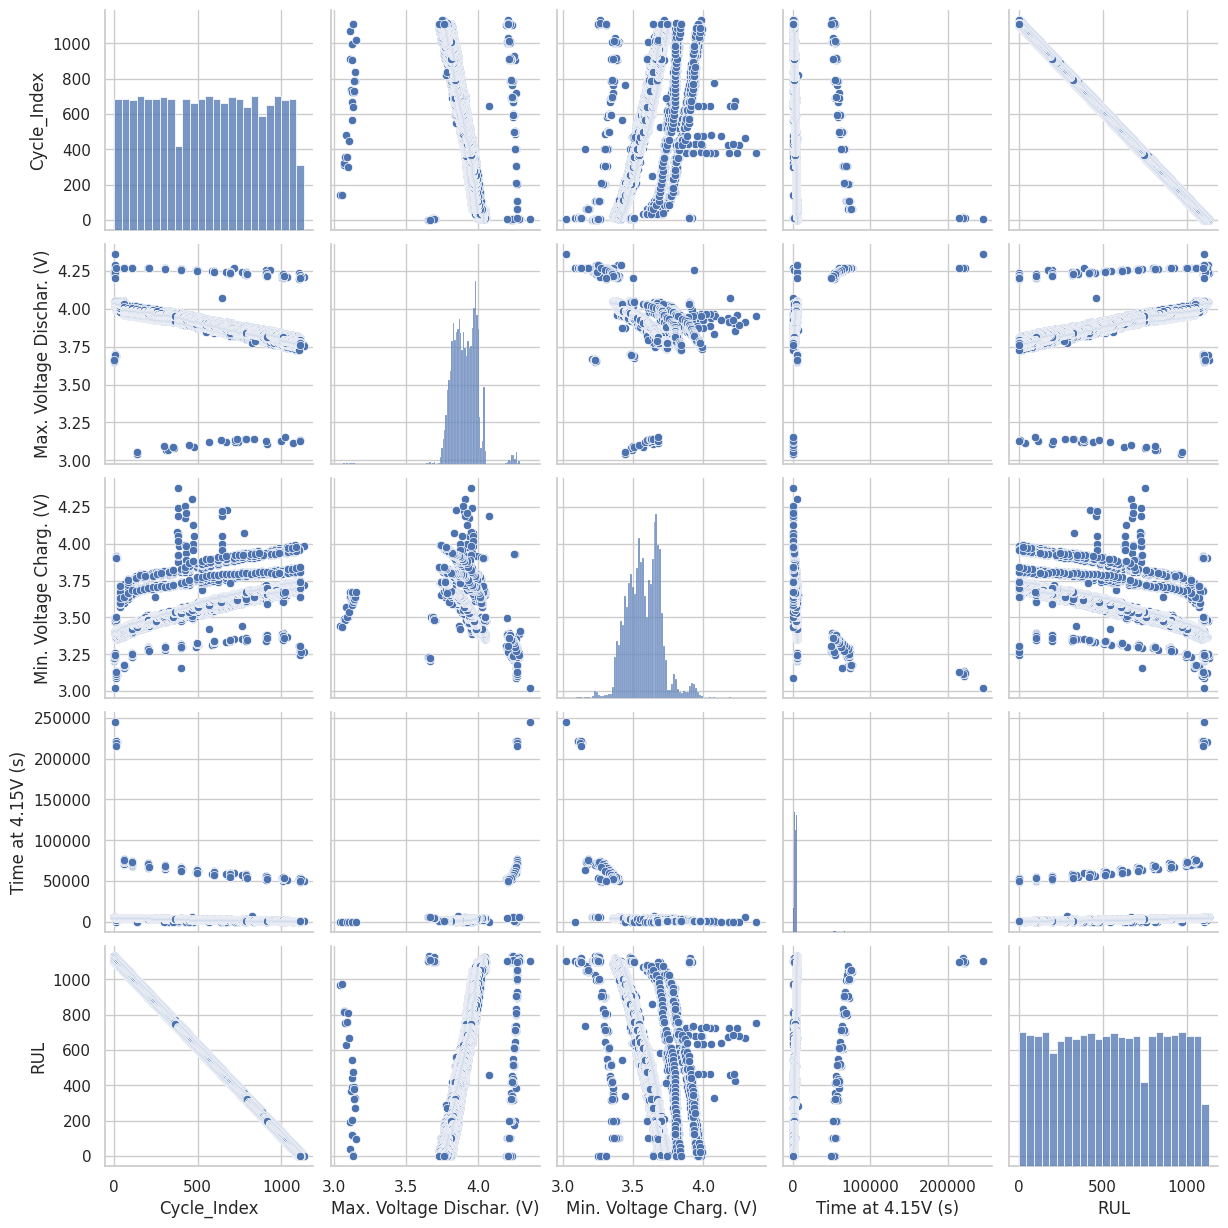

In [ ]:
sns.pairplot(df_new)

Diving the dataset into dependent(X/Target feature) and independent variables

In [ ]:
X = df.drop('RUL',axis=1)
X.head()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s)
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65


In [ ]:
y = df.drop(X,axis=1)
y.head()

,RUL
0,1112
1,1111
2,1110
3,1109
4,1107


Performing train-test split and implementing **Random Forest Regressor**

In [ ]:
# Import required libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import time

In [ ]:
# Load and split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
# Create the regressor
regressor = RandomForestRegressor()

# Train the regressor on the training data
start_time = time.time()
regressor.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time
print("Time required to train Random Forest model:", training_time)

<ipython-input-51-7497963aa99f>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train, y_train)


Time required to train Random Forest model: 6.438752889633179


In [ ]:
# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model
score = regressor.score(X_test, y_test)
print(score)

0.9998598795802797


Evaluating the model with various measures
The model accuracy comes out to be 99.98%. The results are quite good for the KNN regressor. The mean absolute error (MAE) was 2.10, which is a pretty low value. The average absolute difference between the actual and anticipated values is represented by the MAE. A lower MAE shows that the model's forecasts are typically close to the measured values. The 14.40 MSE value is a sizable value. The squared variance between the actual and anticipated values are averaged to get the MSE. A higher MSE indicates that the model is more sensitive to outliers and that its predictions may have more mistakes. The Root Mean Squared Error (RMSE) value of 3.79 is a useful indicator of how widely errors are distributed in the same units as the target variable. The fact that RMSE is higher than MAE but still quite tiny shows that the model's predictions have a pretty low inaccuracy when the spread is taken into account. An extremely high R-squared value of 0.99 can be found from the model. The percentage of the target variable's variance that the model can account for is shown by R-squared.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [ ]:
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# R-squared (R2) - Explained variance score: 1 is perfect prediction
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)
print("Model Accuracy:", score)

Mean Absolute Error (MAE): 2.1072012745618687
Mean Squared Error (MSE): 14.405749283058952
Root Mean Squared Error (RMSE): 3.7954906511621065
R-squared (R2): 0.9998598795802797
Model Accuracy: 0.9998598795802797


Implemeting the **K Nearest Neighbors** Algorithm

In [ ]:
from sklearn import neighbors
from math import sqrt

Using for loop to get iterate values of k and checking for the best value of k

In [ ]:
rmse_val = [] #to store rmse values for different k
for K in range(10):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 24.343488182426626
RMSE value for k=  2 is: 23.06606198754748
RMSE value for k=  3 is: 23.92468908105074
RMSE value for k=  4 is: 22.33024785943098
RMSE value for k=  5 is: 22.482189800039322
RMSE value for k=  6 is: 22.944153119882706
RMSE value for k=  7 is: 23.536600451135342
RMSE value for k=  8 is: 25.187578449279492
RMSE value for k=  9 is: 26.491011244513643
RMSE value for k=  10 is: 28.21227628518683


<Axes: >

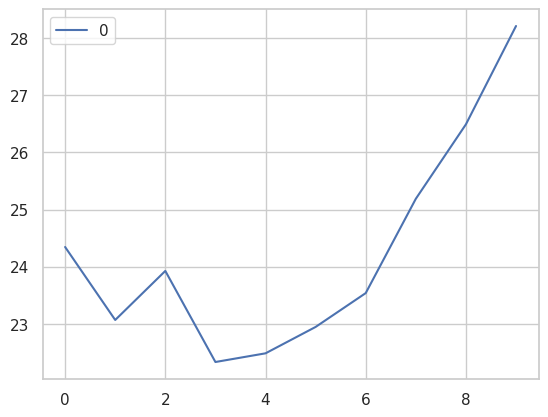

In [ ]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve
curve.plot()

Using the GridSearch method to find optimal value of K

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 3}

Fitting the data into model with K=3

In [ ]:
final_model = neighbors.KNeighborsRegressor(n_neighbors = 3)
start_time = time.time()
final_model.fit(X_train,y_train)
end_time = time.time()
training_time = end_time - start_time
print("Time required to train KNN model:", training_time)
y_pred=final_model.predict(X_test)

Time required to train KNN model: 0.024513959884643555


Evaluating the KNN model with various measures

In [ ]:
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
score = final_model.score(X_test, y_test)
print(score)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# R-squared (R2) - Explained variance score: 1 is perfect prediction
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

0.994432526193165
Mean Absolute Error (MAE): 8.89838909541512
Mean Squared Error (MSE): 572.3907476249485
Root Mean Squared Error (RMSE): 23.92468908105074
R-squared (R2): 0.994432526193165
